# 1 - Regresión Logística

Regresión logistica sobre los datos de entrenamiento. 

Se divide el dataset de entrenamiento en train y test para probar las métricas del modelo con etiquetas conocidas.

Se lleva acabo el modelo sobre los dataset de los distintos tramientos de variables

"Task complete" check para cada uno de ellos.

- Tratamiento 1
- Tratamiento 2
- Tratamiento 3
- Tratamiento 4


#### Paquetes

In [73]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics , cross_validation
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Datos tratamiento 1

In [74]:
# Recuperamos los datos del tratamiento 1
%store -r newtrain_t1
newtrain_t1.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      age_21  age_22  age_23  age_24  age_25  age_26  age_27    ...     \
tr 0       0       0       0       0       0       0       0    ...      
   1       0       0       0       0       0       0       0    ...      
   2       0       0       0       0       0       0       0    ...      
   3       0       0       0       0       0       0       0    ...      
   4       0       0       0       0       0       0       0    ...      

      Rent_(2044.0, 3000.0]  Rent_(3000.0, 3800.0]  Rent_(3800.0, 4550.0]  \
tr 0                      0                      0                      0   
   1                      1                      0                      0   
   2                      0                      1                      0   
   3                      0                      1                      0   
   4                      0                      0                      0   

      Rent_(4550.0, 5400.0]  Rent_(5400.0, 6300.0]  Rent_(6300.0, 7500.0]  \
tr 0                      0                      0                      0   
   1                      0                      0                      0   
   2                      0                      0                      0   
   3                      0                      0                      0   
   4                      0                      0                      0   

      Rent_(7500.0, 9060.0]  Rent_(9060.0, 11600.0]  \
tr 0                      0                       1   
   1                      0                       0   
   2                      0                       0   
   3                      0                       0   
   4                      0                       0   

      Rent_(11600.0, 7727000.0]  Rent_nan  
tr 0                          0         0  
   1                          0         0  
   2                          0         0  
   3                          0         0  
   4                          1         0  

[5 rows x 249 columns]

#### Datos train y datos testing

In [75]:
# asignamos variable dependiente e independiente
X = newtrain_t1.iloc[:,1:] # features
y = newtrain_t1.iloc[:,0] # variable target


In [76]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [77]:
# 105K obs en train, 45 K en test
# 248 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 248)
(45000, 248)
(105000,)
(45000,)


## Modelos

### 1) Modelo sin CV

In [78]:
# instanciamos el modelo con los parámetros oportunos para evitar problemas como consecuencia del desbalanceo de la variable target.
logreg = LogisticRegression(random_state=0, class_weight = "balanced",penalty = "l1", max_iter = 100)

# ajustamos el modelo con el train
logreg.fit(X_train,y_train)

# Predecimos
y_pred=logreg.predict(X_test)

**Métricas**

- **Matriz de confusión (Modelo sin CV)**

In [79]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[35191,  6774],
       [ 1046,  1989]], dtype=int64)

In [80]:
print (metrics.accuracy_score(y_test, y_pred))

0.8262222222222222


In [81]:
# Métricas
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.84      0.90     41965
          1       0.23      0.66      0.34      3035

avg / total       0.92      0.83      0.86     45000



In [82]:
# coeficiente de determinación
r2_score(y_test, y_pred)

-1.7629520246239556

-  **Curva ROC (Modelo sin CV)**

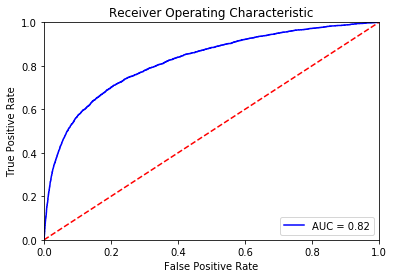

In [83]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2) Modelo CV (Sobre toda la muestra de training)

In [84]:
# modelo con validación cruzada. 10 folds.
y_pred_cv = cross_validation.cross_val_predict(logreg, X, y, cv=10)

In [85]:
print (metrics.accuracy_score(y, y_pred_cv)) # ligeramente superior al modelo sin CV

0.8293333333333334


- **Matriz de confusión (Modelo CV)**

In [86]:
# Matriz de confusión
cnf_matrix_LG = metrics.confusion_matrix(y, y_pred_cv)
cnf_matrix_LG

array([[117627,  22347],
       [  3253,   6773]], dtype=int64)

In [87]:
# Métricas
metricas_LG_t1 = classification_report(y, y_pred_cv)

print(metricas_LG_t1)

             precision    recall  f1-score   support

          0       0.97      0.84      0.90    139974
          1       0.23      0.68      0.35     10026

avg / total       0.92      0.83      0.86    150000



In [88]:
# coeficiente de determinación
r2_score(y, y_pred_cv)

-1.7362523690708151

- **Curva ROC (Modelo CV)**

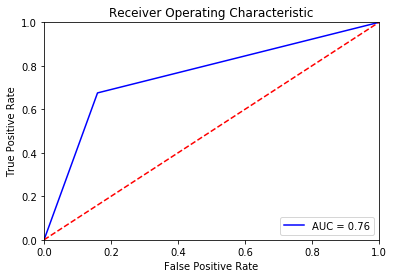

In [89]:
fpr, tpr, threshold = metrics.roc_curve(y, y_pred_cv)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

![title](imagen/task.png)

## Datos tratamiento 2

In [90]:
# Recuperamos los datos del tratamiento 2
%store -r newtrain_t2
newtrain_t2.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      MonthlyIncome  age_21  age_22  age_23  age_24  age_25  age_26    ...     \
tr 0         9120.0       0       0       0       0       0       0    ...      
   1         2600.0       0       0       0       0       0       0    ...      
   2         3042.0       0       0       0       0       0       0    ...      
   3         3300.0       0       0       0       0       0       0    ...      
   4        63588.0       0       0       0       0       0       0    ...      

      nDep_5.0  nDep_6.0  nDep_7.0  nDep_8.0  nDep_9.0  nDep_10.0  nDep_13.0  \
tr 0         0         0         0         0         0          0          0   
   1         0         0         0         0         0          0          0   
   2         0         0         0         0         0          0          0   
   3         0         0         0         0         0          0          0   
   4         0         0         0         0         0          0          0   

      nDep_20.0  nDep_43.0  nDep_nan  
tr 0          0          0         0  
   1          0          0         0  
   2          0          0         0  
   3          0          0         0  
   4          0          0         0  

[5 rows x 216 columns]

#### Datos train y datos testing

In [91]:
# asignamos variable dependiente e independiente
X = newtrain_t2.iloc[:,1:] # features
y = newtrain_t2.iloc[:,0] # variable target


In [92]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [93]:
# 105K obs en train, 45K en test
# 215 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 215)
(45000, 215)
(105000,)
(45000,)


## Modelos

### 1) Modelo sin CV

In [94]:
# instanciamos el modelo con los parámetros oportunos para evitar problemas como consecuencia del desbalanceo de la variable target.
logreg = LogisticRegression(random_state=0, class_weight = "balanced",penalty = "l1", max_iter = 100)

# ajustamos el modelo con el train
logreg.fit(X_train,y_train)

# Predecimos
y_pred=logreg.predict(X_test)

**Métricas**

- **Matriz de confusión (Modelo sin CV)**

In [95]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34714,  7251],
       [ 1015,  2020]], dtype=int64)

In [96]:
# Métricas
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.83      0.89     41965
          1       0.22      0.67      0.33      3035

avg / total       0.92      0.82      0.86     45000



In [97]:
# coeficiente de determinación
r2_score(y_test, y_pred)

-1.9205321528825596

-  **Curva ROC (Modelo sin CV)**

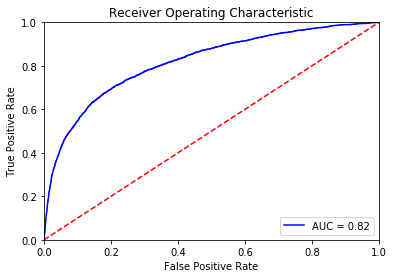

In [98]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2) Modelo CV (Sobre toda la muestra de training)

In [99]:
# modelo con validación cruzada. 10 folds.
y_pred_cv = cross_validation.cross_val_predict(logreg, X, y, cv=10)

In [100]:
print (metrics.accuracy_score(y, y_pred_cv)) # ligeramente inferior al tratamiento 1 con CV

0.81962


- **Matriz de confusión (Modelo CV)**

In [101]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y, y_pred_cv)
cnf_matrix

array([[116048,  23926],
       [  3131,   6895]], dtype=int64)

In [102]:
# Métricas
metricas_LG_t2 = classification_report(y, y_pred_cv)

print(metricas_LG_t2)

             precision    recall  f1-score   support

          0       0.97      0.83      0.90    139974
          1       0.22      0.69      0.34     10026

avg / total       0.92      0.82      0.86    150000



In [103]:
# coeficiente de determinación
r2_score(y, y_pred_cv)

-1.8919836074198844

- **Curva ROC (Modelo CV)**

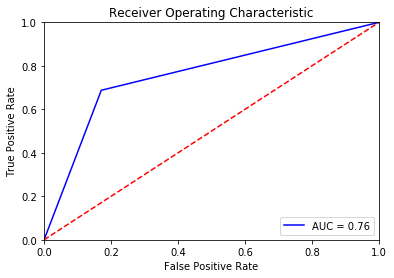

In [104]:
fpr, tpr, threshold = metrics.roc_curve(y, y_pred_cv)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

![title](imagen/task.png)

## Datos tratamiento 3

In [105]:
# Recuperamos los datos del tratamiento 3
%store -r newtrain_t3
newtrain_t3.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      MonthlyIncome  age_21  age_22  age_23  age_24  age_25  age_26    ...     \
tr 0         9120.0       0       0       0       0       0       0    ...      
   1         2600.0       0       0       0       0       0       0    ...      
   2         3042.0       0       0       0       0       0       0    ...      
   3         3300.0       0       0       0       0       0       0    ...      
   4        63588.0       0       0       0       0       0       0    ...      

      nDep_5.0  nDep_6.0  nDep_7.0  nDep_8.0  nDep_9.0  nDep_10.0  nDep_13.0  \
tr 0         0         0         0         0         0          0          0   
   1         0         0         0         0         0          0          0   
   2         0         0         0         0         0          0          0   
   3         0         0         0         0         0          0          0   
   4         0         0         0         0         0          0          0   

      nDep_20.0  nDep_43.0  nDep_nan  
tr 0          0          0         0  
   1          0          0         0  
   2          0          0         0  
   3          0          0         0  
   4          0          0         0  

[5 rows x 197 columns]

#### Datos train y datos testing

In [106]:
# asignamos variable dependiente e independiente
X = newtrain_t3.iloc[:,1:] # features
y = newtrain_t3.iloc[:,0] # variable target


In [107]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [108]:
# 105K obs en train, 45K en test
# 196 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 196)
(45000, 196)
(105000,)
(45000,)


## Modelos

### 1) Modelo sin CV

In [109]:
# instanciamos el modelo con los parámetros oportunos para evitar problemas como consecuencia del desbalanceo de la variable target.
logreg = LogisticRegression(random_state=0, class_weight = "balanced",penalty = "l1", max_iter = 100)

# ajustamos el modelo con el train
logreg.fit(X_train,y_train)

# Predecimos
y_pred=logreg.predict(X_test)

**Métricas**

- **Matriz de confusión (Modelo sin CV)**

In [110]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34757,  7208],
       [ 1046,  1989]], dtype=int64)

In [111]:
# Métricas
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.83      0.89     41965
          1       0.22      0.66      0.33      3035

avg / total       0.92      0.82      0.86     45000



In [112]:
# coeficiente de determinación
r2_score(y_test, y_pred)

-1.916292328803853

-  **Curva ROC (Modelo sin CV)**

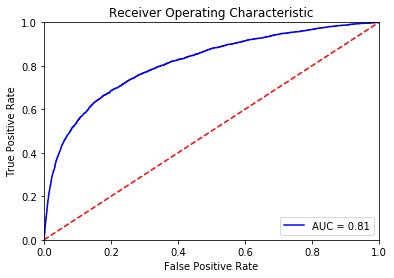

In [113]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2) Modelo CV (Sobre toda la muestra de training)

In [114]:
# modelo con validación cruzada. 10 folds.
y_pred_cv = cross_validation.cross_val_predict(logreg, X, y, cv=10)

In [115]:
print (metrics.accuracy_score(y, y_pred_cv)) 

0.8212


- **Matriz de confusión (Modelo CV)**

In [116]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y, y_pred_cv)
cnf_matrix

array([[116349,  23625],
       [  3195,   6831]], dtype=int64)

In [117]:
# Métricas
metricas_LG_t3 = classification_report(y, y_pred_cv)

print(metricas_LG_t3)

             precision    recall  f1-score   support

          0       0.97      0.83      0.90    139974
          1       0.22      0.68      0.34     10026

avg / total       0.92      0.82      0.86    150000



In [118]:
# coeficiente de determinación
r2_score(y, y_pred_cv)

-1.8666518960343463

- **Curva ROC (Modelo CV)**

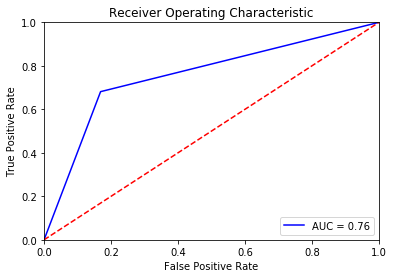

In [119]:
fpr, tpr, threshold = metrics.roc_curve(y, y_pred_cv)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

![title](imagen/task.png)

## Datos tratamiento 4

In [120]:
# Recuperamos los datos del tratamiento 1
%store -r newtrain_t4
newtrain_t4.head(5)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  DebtRatio  \
tr 0                 1                              0.766127   0.802982   
   1                 0                              0.957151   0.121876   
   2                 0                              0.658180   0.085113   
   3                 0                              0.233810   0.036050   
   4                 0                              0.907239   0.024926   

      age_21  age_22  age_23  age_24  age_25  age_26  age_27    ...     \
tr 0       0       0       0       0       0       0       0    ...      
   1       0       0       0       0       0       0       0    ...      
   2       0       0       0       0       0       0       0    ...      
   3       0       0       0       0       0       0       0    ...      
   4       0       0       0       0       0       0       0    ...      

      Rent_(2044.0, 3000.0]  Rent_(3000.0, 3800.0]  Rent_(3800.0, 4550.0]  \
tr 0                      0                      0                      0   
   1                      1                      0                      0   
   2                      0                      1                      0   
   3                      0                      1                      0   
   4                      0                      0                      0   

      Rent_(4550.0, 5400.0]  Rent_(5400.0, 6300.0]  Rent_(6300.0, 7500.0]  \
tr 0                      0                      0                      0   
   1                      0                      0                      0   
   2                      0                      0                      0   
   3                      0                      0                      0   
   4                      0                      0                      0   

      Rent_(7500.0, 9060.0]  Rent_(9060.0, 11600.0]  \
tr 0                      0                       1   
   1                      0                       0   
   2                      0                       0   
   3                      0                       0   
   4                      0                       0   

      Rent_(11600.0, 7727000.0]  Rent_nan  
tr 0                          0         0  
   1                          0         0  
   2                          0         0  
   3                          0         0  
   4                          1         0  

[5 rows x 206 columns]

#### Datos train y datos testing

In [121]:
# asignamos variable dependiente e independiente
X = newtrain_t4.iloc[:,1:] # features
y = newtrain_t4.iloc[:,0] # variable target


In [122]:
# Definimos cada una de las partes. Entrenamos con el 70% de las obs.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [123]:
# 105K obs en train, 45K en test
# 205 variables
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105000, 205)
(45000, 205)
(105000,)
(45000,)


## Modelos

### 1) Modelo sin CV

In [124]:
# instanciamos el modelo con los parámetros oportunos para evitar problemas como consecuencia del desbalanceo de la variable target.
logreg = LogisticRegression(random_state=0, class_weight = "balanced",penalty = "l1", max_iter = 100)

# ajustamos el modelo con el train
logreg.fit(X_train,y_train)

# Predecimos
y_pred=logreg.predict(X_test)

**Métricas**

- **Matriz de confusión (Modelo sin CV)**

In [125]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34705,  7260],
       [ 1042,  1993]], dtype=int64)

In [126]:
# Métricas
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.83      0.89     41965
          1       0.22      0.66      0.32      3035

avg / total       0.92      0.82      0.85     45000



In [127]:
# coeficiente de determinación
r2_score(y_test, y_pred)

-1.9332516251186802

-  **Curva ROC (Modelo sin CV)**

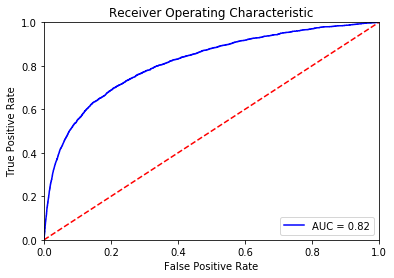

In [128]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2) Modelo CV (Sobre toda la muestra de training)

In [129]:
# modelo con validación cruzada. 10 folds.
y_pred_cv = cross_validation.cross_val_predict(logreg, X, y, cv=10)

In [130]:
print (metrics.accuracy_score(y, y_pred_cv)) 

0.8204266666666666


- **Matriz de confusión (Modelo CV)**

In [131]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y, y_pred_cv)
cnf_matrix

array([[116226,  23748],
       [  3188,   6838]], dtype=int64)

In [132]:
# Métricas
metricas_LG_t4 = classification_report(y, y_pred_cv)

print(metricas_LG_t4)

             precision    recall  f1-score   support

          0       0.97      0.83      0.90    139974
          1       0.22      0.68      0.34     10026

avg / total       0.92      0.82      0.86    150000



In [133]:
# coeficiente de determinación
r2_score(y, y_pred_cv)

-1.8790505395816983

- **Curva ROC (Modelo CV)**

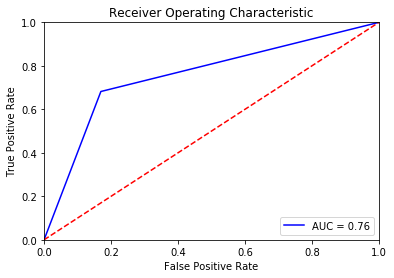

In [134]:
fpr, tpr, threshold = metrics.roc_curve(y, y_pred_cv)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

![title](imagen/task.png)

<div class="alert alert-block alert-info">
<b>Conclusiones</b> 
</div>

#### Tratamiento 1

In [135]:
metricas_LG_t1 # métricas modelo logístico con datos tratamiento 1

'             precision    recall  f1-score   support\n\n          0       0.97      0.84      0.90    139974\n          1       0.23      0.68      0.35     10026\n\navg / total       0.92      0.83      0.86    150000\n'

In [136]:
%store metricas_LG_t1 

Stored 'metricas_LG_t1' (str)


In [137]:
%store cnf_matrix_LG

Stored 'cnf_matrix_LG' (ndarray)


#### Tratamiento 2

In [138]:
metricas_LG_t2 # métricas modelo logístico con datos tratamiento 2

'             precision    recall  f1-score   support\n\n          0       0.97      0.83      0.90    139974\n          1       0.22      0.69      0.34     10026\n\navg / total       0.92      0.82      0.86    150000\n'

In [139]:
%store metricas_LG_t2

Stored 'metricas_LG_t2' (str)


#### Tratamiento 3

In [140]:
metricas_LG_t3  # métricas modelo logístico con datos tratamiento 3

'             precision    recall  f1-score   support\n\n          0       0.97      0.83      0.90    139974\n          1       0.22      0.68      0.34     10026\n\navg / total       0.92      0.82      0.86    150000\n'

In [141]:
%store metricas_LG_t3

Stored 'metricas_LG_t3' (str)


#### Tratamiento 4

In [142]:
metricas_LG_t4 # métricas modelo logístico con datos tratamiento 4

'             precision    recall  f1-score   support\n\n          0       0.97      0.83      0.90    139974\n          1       0.22      0.68      0.34     10026\n\navg / total       0.92      0.82      0.86    150000\n'

In [143]:
%store metricas_LG_t4

Stored 'metricas_LG_t4' (str)
